## Q1. What is Min-Max scaling, and how is it used in data preprocessing? Provide an example to illustrate its application.

`Min-Max scaling `is a data preprocessing technique used to rescale numerical data into a fixed range of values. It works by scaling the data in such a way that the minimum value is transformed to a new minimum value (often 0), and the maximum value is transformed to a new maximum value (often 1).

The formula for Min-Max scaling is given by:

## $$ X_{scaled} = \frac{X-X_{min}}{X_{max} - X_{min}} $$

where `X` is the original value, `X_min` is the minimum value in the dataset, and `X_max`is the maximum value in the dataset.

`Min-Max scaling` is useful when the data values have different ranges and scales, and we want to bring them to a common scale. It helps to improve the performance of some machine learning algorithms, especially those that use distance-based metrics.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [33]:
age = np.random.randint(10, 50, size=20)
salary = np.random.randint(10000,50000,size=20)
df = {"age":age,
     "salary":salary
     }
df= pd.DataFrame(df)
df

,age,salary
0,34,21468
1,21,26465
2,27,36339
3,11,12572
4,35,25991
5,14,45107
6,12,14293
7,19,40374
8,43,13703
9,37,19225


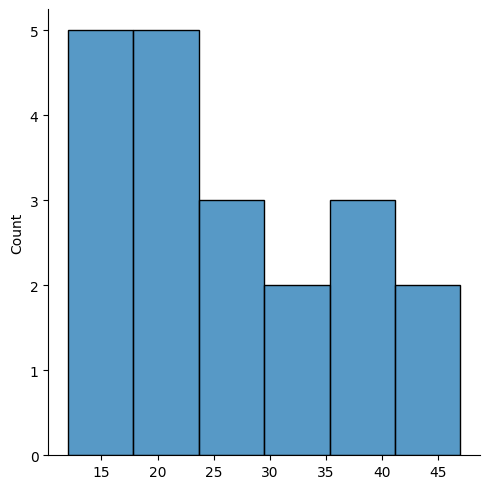

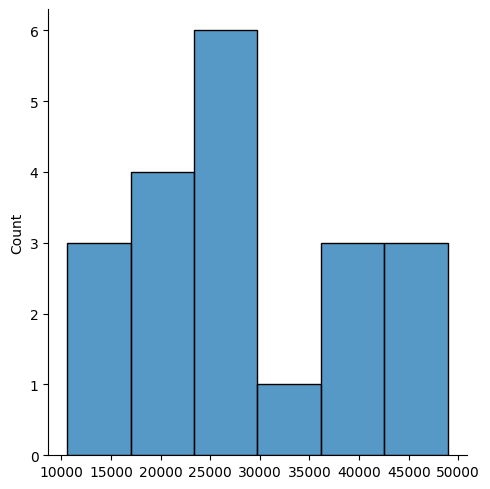

In [11]:
sns.displot(df["age"])
sns.displot(df["salary"])

In [28]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()

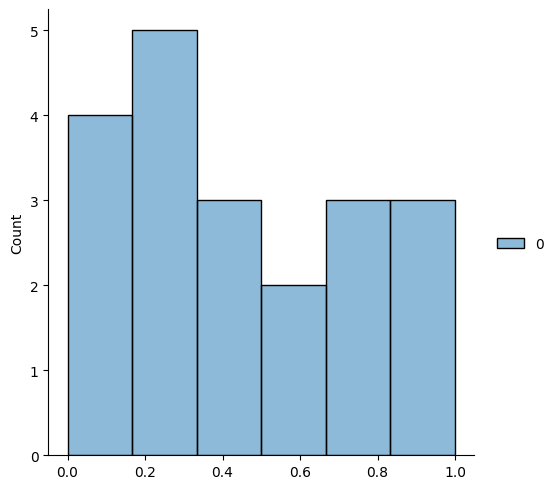

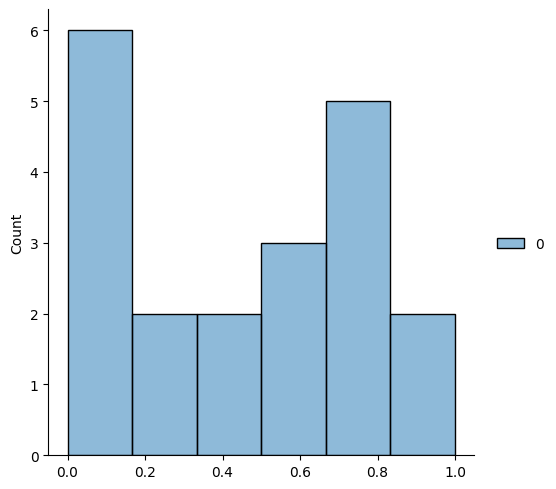

In [37]:
sns.displot(min_max.fit_transform(df[["age"]]))
sns.displot(min_max.fit_transform(df[["salary"]]))

# Q2. What is the Unit Vector technique in feature scaling, and how does it differ from Min-Max scaling? Provide an example to illustrate its application.

The unit vector technique in `feature scaling` is a normalization method that scales each feature to have a unit norm, i.e., a Euclidean norm of 1. This technique is also known as `L2 normalization`. The idea behind this technique is to scale each feature such that their magnitudes become comparable, and no single feature dominates the others.

In contrast, Min-Max scaling (also known as `MinMax normalization`) scales the values of a feature to a fixed range, typically between 0 and 1.

In [38]:
from sklearn.preprocessing import normalize

In [40]:
pd.DataFrame(normalize(df[["age","salary"]]))

,0,1
0,0.001584,0.999999
1,0.000794,1.000000
2,0.000743,1.000000
3,0.000875,1.000000
4,0.001347,0.999999
5,0.000310,1.000000
6,0.000840,1.000000
7,0.000471,1.000000
8,0.003138,0.999995
9,0.001925,0.999998


# Q3. What is PCA (Principle Component Analysis), and how is it used in dimensionality reduction? Provide an example to illustrate its application.

`PCA (Principal Component Analysis)` is a dimensionality reduction technique used to reduce the number of features in a dataset while retaining most of the information contained in the original data.

`PCA` works by finding the principal components of the data, which are new variables that are linear combinations of the original features. These principal components are ranked based on the amount of variation they explain in the data, with the first principal component explaining the most variation, the second explaining the second-most, and so on.

The goal of `PCA `is to reduce the dimensionality of the data by projecting it onto a lower-dimensional space spanned by the first `k` principal components, where `k` is a number chosen by the user. This lower-dimensional space is chosen to retain most of the information in the data, while reducing its complexity.

In [71]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

In [72]:
iris = load_iris()
X = iris.data
y = iris.target

# Create a PCA object with 2 components
pca = PCA(n_components=2)

# Fit the PCA model on the Iris dataset
pca.fit(X)

# Transform the Iris dataset using the fitted PCA model
X_transformed = pca.transform(X)

# Print the first 5 rows of the transformed dataset
print(X_transformed[:5,:])

[[-2.68412563  0.31939725]
 [-2.71414169 -0.17700123]
 [-2.88899057 -0.14494943]
 [-2.74534286 -0.31829898]
 [-2.72871654  0.32675451]]


## Q4. What is the relationship between PCA and Feature Extraction, and how can PCA be used for Feature Extraction? Provide an example to illustrate this concept.

`PCA (Principal Component Analysis)` is a popular dimensionality reduction technique that is commonly used in machine learning and data analysis to identify the most important features in a dataset. In essence, PCA can be seen as a type of feature extraction technique, where the goal is to transform a set of high-dimensional features into a smaller set of meaningful and informative features.

The basic idea behind `PCA` is to identify a set of new variables (called principal components) that are linear combinations of the original variables and capture the most variation in the data. These new variables are orthogonal to each other and are ranked by their variance, such that the first principal component explains the most variance in the data, the second principal component explains the second most variance, and so on.

`PCA` can be used for feature extraction by applying it to a dataset that has a large number of features, where many of these features are correlated or redundant. By applying `PCA` to this dataset, we can extract a smaller number of principal components that capture most of the variation in the data and can be used as a new, reduced set of features.

To illustrate how `PCA` can be used for feature extraction, let's consider a simple example. Suppose we have a dataset of images, where each image has 1000 pixels. We want to extract features from these images to train a machine learning model that can classify these images. However, the high-dimensional nature of the dataset makes it difficult to train the model effectively.

To reduce the dimensionality of the dataset, we can apply `PCA` to extract the most important features. We can first normalize the pixel values and then use PCA to transform the images into a new set of features. The new features will be a linear combination of the original pixel values, where each feature represents a direction in the original pixel space.

After applying `PCA`, we can select the first few principal components that explain the most variance in the data. For example, we might select the first 50 principal components, which would reduce the dimensionality of the dataset from 1000 to 50. We can then use these 50 features to train our machine learning model.

In [2]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA

digits = load_digits()

X = pd.DataFrame(digits.data, columns=digits.feature_names)
y = pd.DataFrame(digits.target, columns=["target"])
df = pd.concat([X, y], axis=1)
df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [26]:
# Perform PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# Convert X_pca to a pandas DataFrame
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2', 'PC3'])

df_trf = pd.concat([df_pca, y], axis=1)

df_trf["target"].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [7]:
import plotly.express as px

## Vistualizing 65 columns dataset as 3 Dimenstion representation

In [36]:
fig = px.scatter_3d(data_frame=df_trf, x=df_trf["PC1"], y=df_trf["PC2"], z=df_trf["PC3"],
              color=df_trf["target"])
fig.show()

# Q5. You are working on a project to build a recommendation system for a food delivery service. The dataset contains features such as price, rating, and delivery time. Explain how you would use Min-Max scaling to preprocess the data.

In the case of the food delivery service recommendation system, the dataset contains features such as price, rating, and delivery time. These features may have different ranges and units, which can make it difficult to compare them and use them in a machine learning model. `Min-Max scaling` can help to standardize these features and make them more comparable.

To use Min-Max scaling to preprocess the data, we would follow these steps:

1. Identify the features that need to be scaled. In this case, we would likely want to scale the price, rating, and delivery time features.

2. Compute the minimum and maximum values for each feature in the dataset.

3. For each feature, subtract the minimum value from each value in the feature, and then divide by the range (i.e., the difference between the maximum and minimum values).

4. The resulting values for each feature will be scaled to the range of 0 to 1.

For example, suppose the minimum and maximum values for the price feature are Rs 5 and Rs 20, respectively. If we have a food item with a price of $15, we would scale it as follows:

$$ scaled- price = (Rs 15 - Rs 5) / (Rs 20 - Rs 5) = 0.5$$

The resulting scaled_price value would be in the range of 0 to 1.

We would repeat this process for each feature that needs to be scaled. Once we have scaled all the features, we can use them in our machine learning model. By scaling the features, we have made them more comparable and reduced the impact of differences in their original ranges and units.

## Q6. You are working on a project to build a model to predict stock prices. The dataset contains many features, such as company financial data and market trends. Explain how you would use PCA to reduce the dimensionality of the dataset.

`Choose the number of principal components`: Choose the number of principal components to retain based on the amount of variance explained. One common approach is to choose the number of principal components that explain a certain percentage of the total variance, such as 95%.

`Transform the data`: Transform the original data into the lower-dimensional space spanned by the selected principal components.

By using PCA for dimensionality reduction, you can reduce the number of features in the dataset while retaining the most important information. This can lead to more efficient and effective models for predicting stock prices.

## Q7. For a dataset containing the following values: [1, 5, 10, 15, 20], perform Min-Max scaling to transform the values to a range of -1 to 1.

To perform Min-Max scaling on the dataset [1, 5, 10, 15, 20] and transform the values to a range of -1 to 1, we can use the following formula:

### $$ x_{scaled} = \frac{(x - x_{min}) }{(x_{max} - x_{min})}  * 2 - 1 $$

In [61]:
x = np.array([1, 5, 10, 15, 20])
x_min = np.min(x)
x_max = np.max(x)

x_scaled = []

for i in x:
    x_scaled.append((i-x_min)/(x_max-x_min)*2 -1)

x_scaled  

[-1.0, -0.5789473684210527, -0.052631578947368474, 0.4736842105263157, 1.0]

# Q8. For a dataset containing the following features: [height, weight, age, gender, blood pressure], perform Feature Extraction using PCA. How many principal components would you choose to retain, and why?

To perform feature extraction using `PCA `on the given dataset, we would first need to normalize the features so that they are on the same scale. We can do this by subtracting the mean and dividing by the standard deviation for each feature.

After normalization, we can apply `PCA` to the dataset to obtain the principal components. The number of principal components to retain depends on the amount of variance we want to preserve in the data.

One way to decide the number of principal components to retain is by looking at the cumulative explained variance `ratio plot`. This plot shows how much variance is explained by each principal component, ordered from most to least. We can choose the number of principal components such that the cumulative explained variance ratio is greater than a certain threshold, such as 90% or 95%.

Another approach is to use the `elbow method`, which involves plotting the explained variance ratio for each principal component and looking for the "elbow" in the plot, where the rate of decrease in explained variance starts to level off. This point represents a good trade-off between preserving variance and reducing dimensionality.

In this case, since we have five features in the dataset, we can obtain up to five principal components. The number of principal components to retain would depend on the amount of variance we want to preserve in the data. We can plot the cumulative explained variance ratio and the explained variance ratio for each principal component to help us make this decision.